In [1]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

116


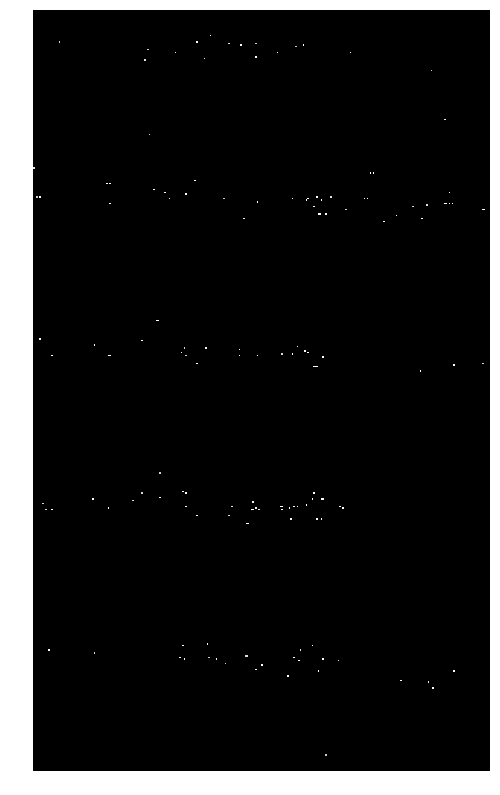

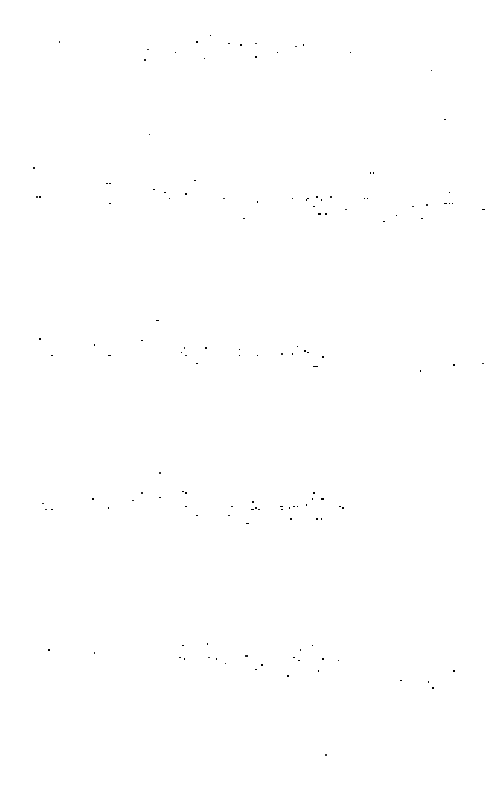

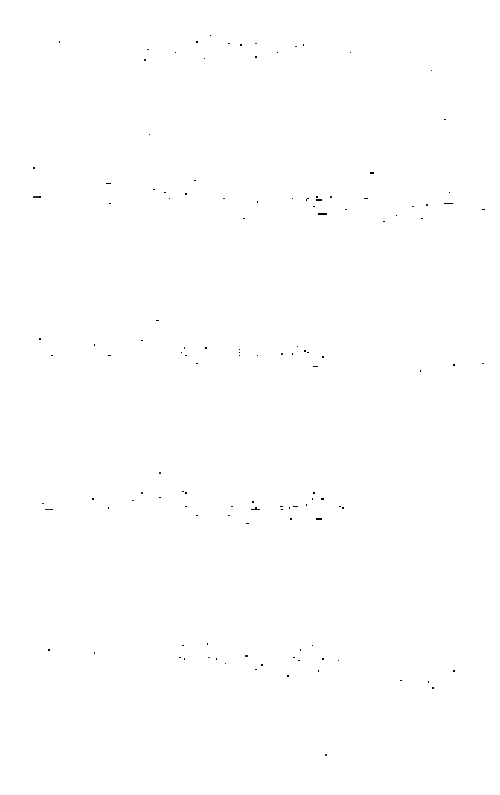

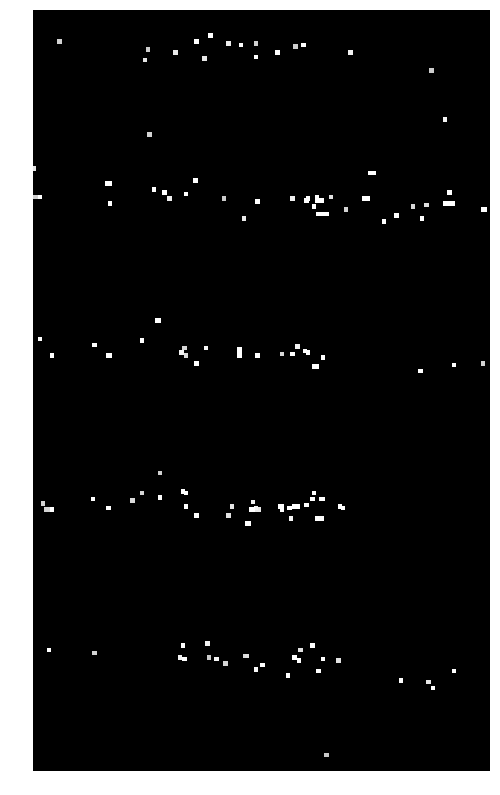

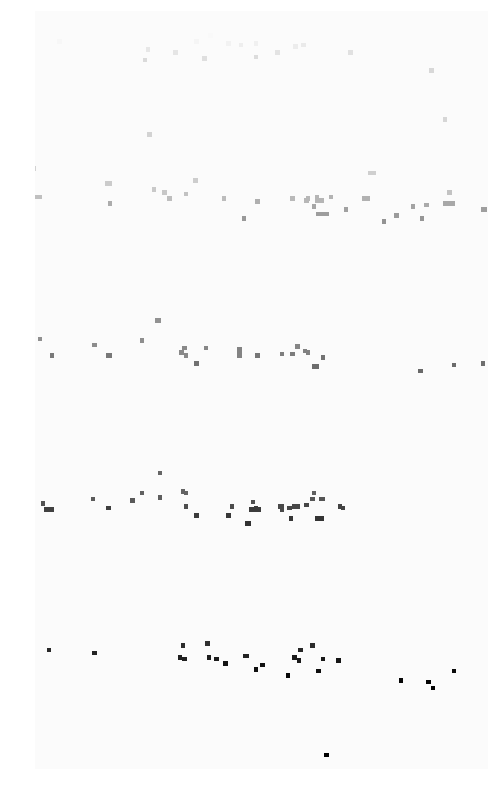

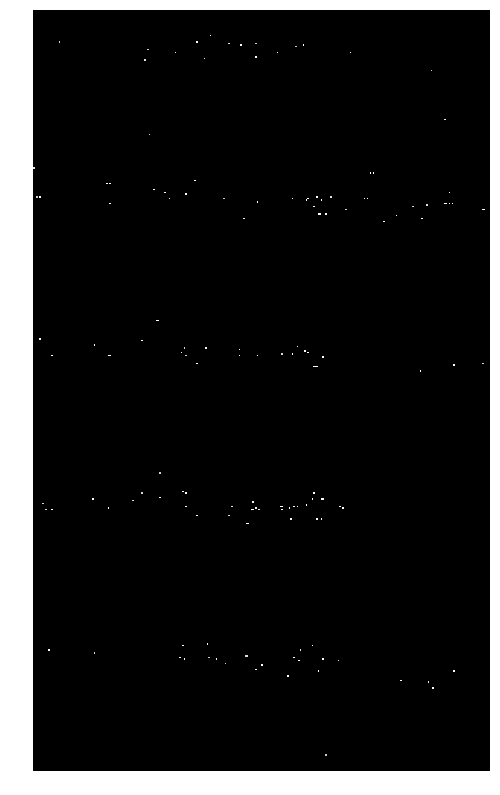

In [42]:
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html
#https://docs.opencv.org/trunk/d9/d61/tutorial_py_morphological_ops.html
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/home/rcardiff/filename.png')
img = img[75000:75500,200:500]
image_show(img)


#thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,3,12)
#image_show(thresh)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_inv = np.invert(gray)
image_show(gray_inv)

# noise removal
#kernel = np.ones((3,3),np.uint8)
kernel1 = np.array([[-1,-1, -1], [0, 0, 0], [1, 1, 1]], np.uint8)
opening = cv.morphologyEx(gray_inv,cv.MORPH_OPEN,kernel1, iterations = 2)
image_show(opening)
#opening = dilation. turns pixel to 1 if a pixel under the kernel is 1, increasing size of object and 
#helping connect broken objects

kernel2 = np.ones((3,3),np.uint8)
grad = cv.morphologyEx(opening,cv.MORPH_GRADIENT, kernel2, iterations =1)
image_show(grad)


#dist_transform = cv.distanceTransform(opening,cv.DIST_L1,0)
#image_show(-dist_transform)

#ret, sure_fg = cv.threshold(-dist_transform,-0.7*dist_transform.max(),255,0)
#image_show(sure_fg)

#sure_bg = cv.dilate(-opening,kernel,iterations=5)
#image_show(sure_bg)

#sure_fg = np.uint8(sure_fg)
#unknown = cv.subtract(sure_fg,sure_bg)
#image_show(unknown)

#dist_transform = cv.distanceTransform(-sure_bg,cv.DIST_L1,0)
#image_show(dist_transform)


# Marker labelling
ret, markers = cv.connectedComponents(grad)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
#markers[unknown==255] = 0



markers = cv.watershed(img,markers)
#img[markers == -1] = [255,0,0]
image_show(-markers)
image_show(img)

from skimage.measure import regionprops
print(len(regionprops(markers)))

138
138


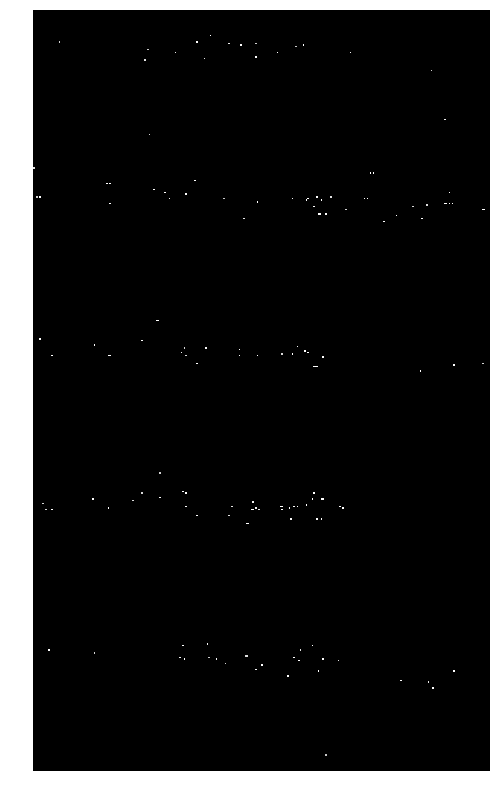

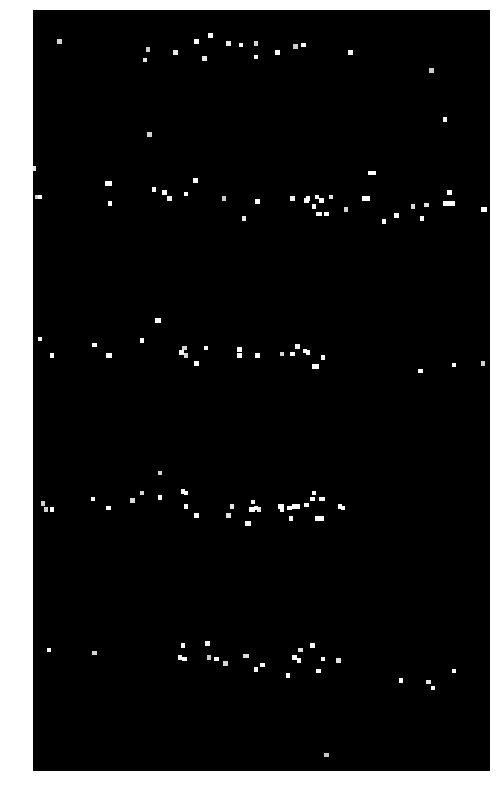

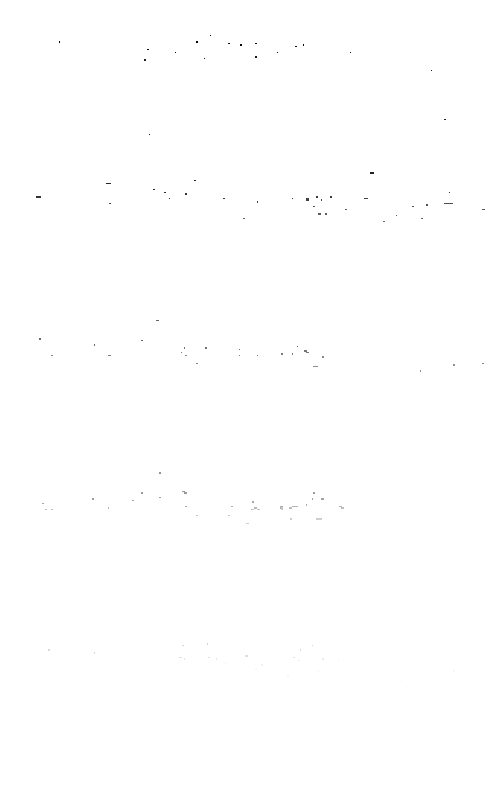

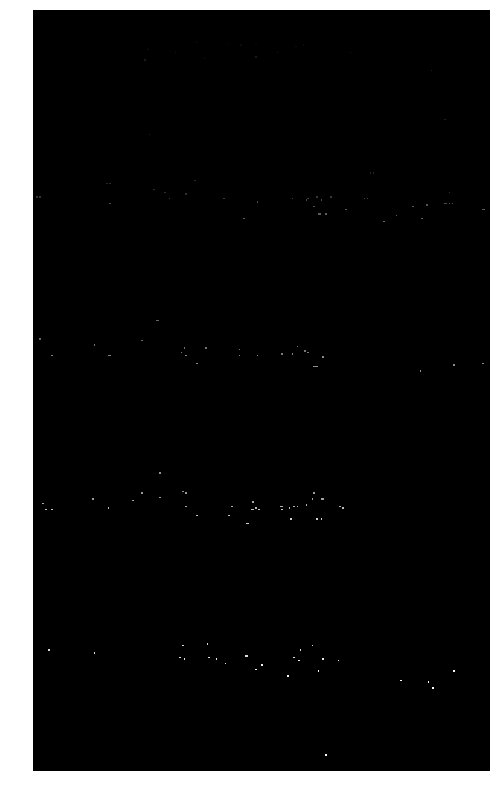

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2 as cv
from skimage import morphology
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.measure import regionprops
import pandas as pd

img = cv.imread('/home/rcardiff/filename.png',0)
image = img[75000:75500,200:500]
#original
image_show(image)

#opening = morphology.dilation(image)
#image_show(opening)

# Generate the markers as local maxima of the distance to the background
grad = ndi.morphological_gradient(image,size=(3,3))
image_show(grad)

#local_maxi = peak_local_max(grad,indices=False, footprint=np.ones((3, 3)),labels=image)
local_maxi = peak_local_max(grad,indices=False, footprint=np.ones((3, 3)),labels=image)
markers = ndi.label(local_maxi)[0]
#num_features = ndi.label(local_maxi)[1]
#print(num_features)
#local_maxi_coord = peak_local_max(grad,indices=True, footprint=np.ones((3, 3)),labels=image)
#print(local_maxi_coord)


labels = watershed(grad,markers)
image_show(labels)
print(len(regionprops(labels)))

labels = watershed(grad,markers,mask = image)
image_show(labels)
print(len(regionprops(labels)))
#image_show(labels)


108


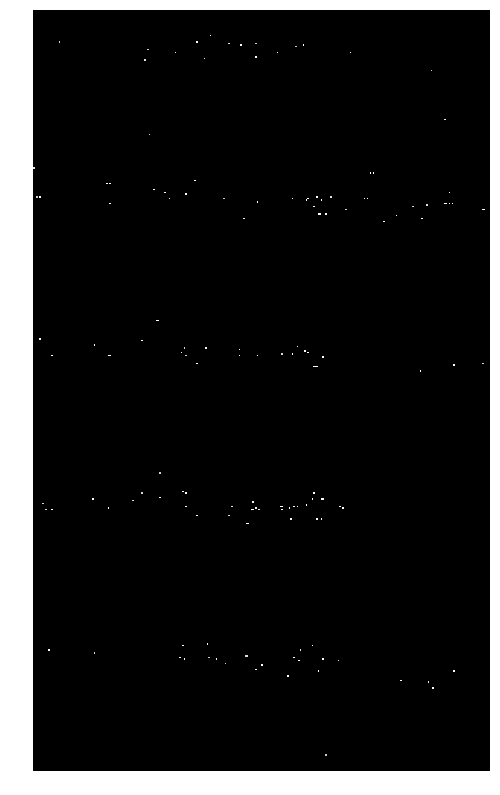

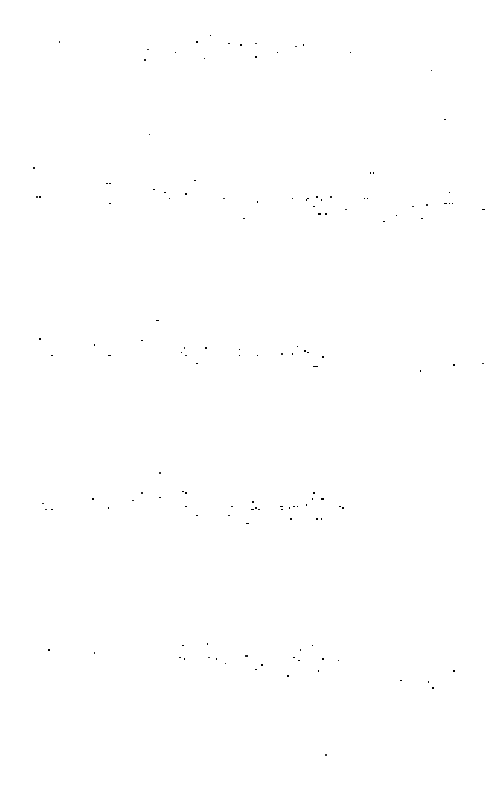

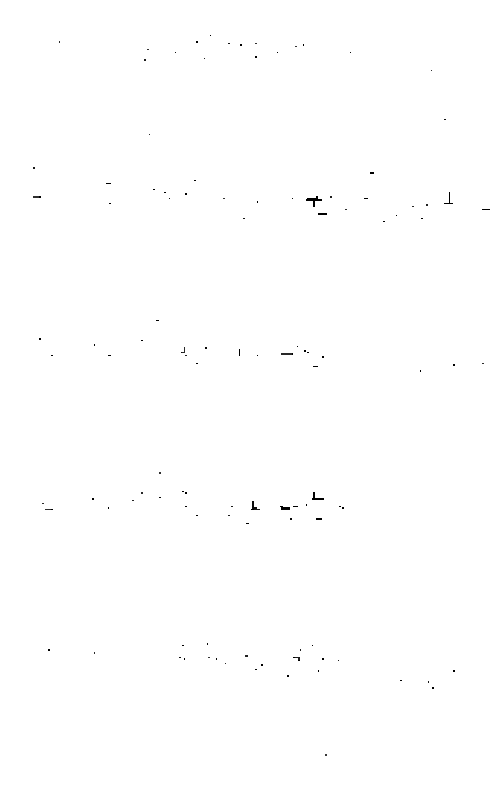

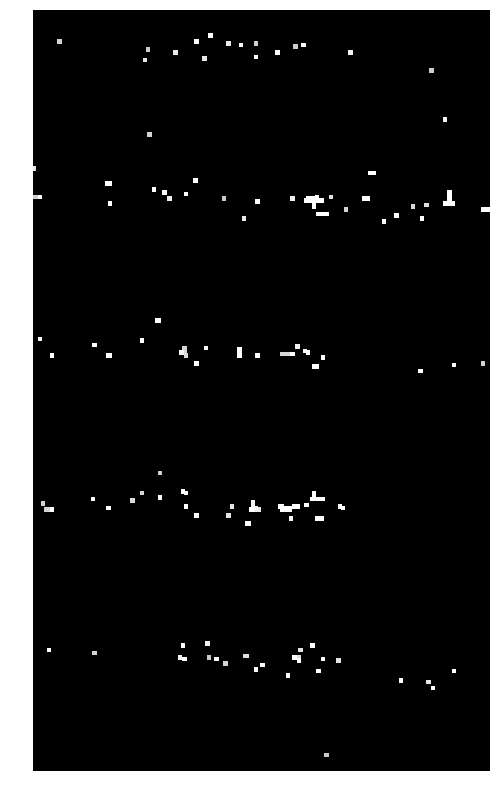

In [21]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import feature
from skimage.morphology import label
from skimage.measure import regionprops

img = cv.imread('/home/rcardiff/filename.png')
img = img[75000:75500,200:500]
image_show(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_inv = np.invert(gray)
image_show(gray_inv)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(gray_inv,cv.MORPH_OPEN,kernel, iterations = 3)
image_show(opening)
#opening = dilation. turns pixel to 1 if a pixel under the kernel is 1, increasing size of object and 
#helping connect broken objects

grad = cv.morphologyEx(opening,cv.MORPH_GRADIENT, kernel, iterations =1)
image_show(grad)


edges = feature.canny(opening, sigma=.1,
                     low_threshold=10,
                     high_threshold=30)



label_image = label(edges)
print(len(regionprops(label_image)))


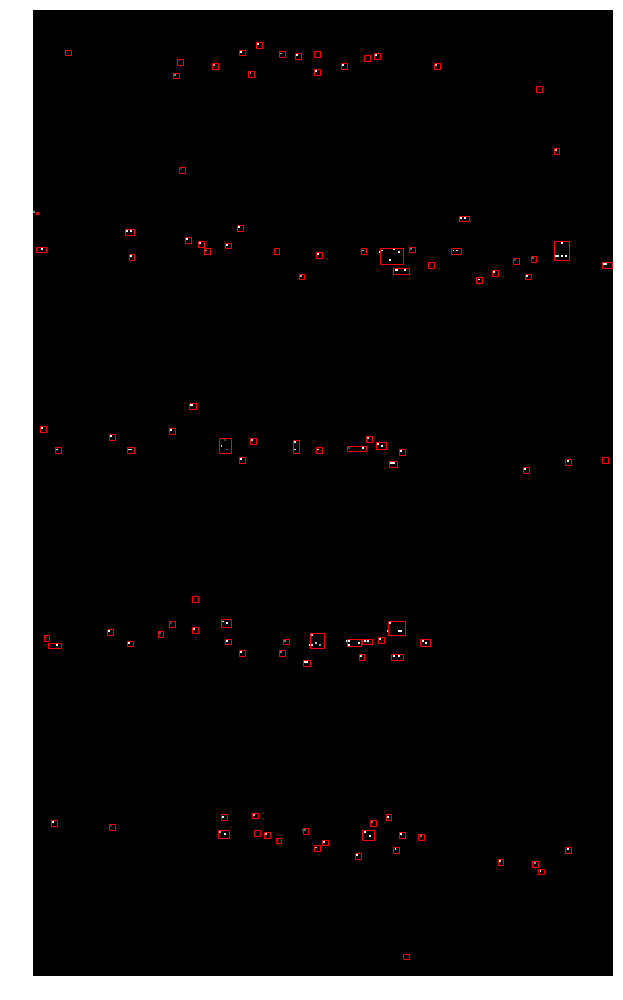

In [22]:
import matplotlib.patches as mpatches

fig, ax5 = plt.subplots(figsize=(14, 14))
ax5.imshow(image, cmap=plt.cm.gray)
ax5.axis('off')

for region in regionprops(label_image):
    # Draw rectangle around segmented coins.
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr)
                              maxc - minc,
                              maxr - minr,
                              fill=False,
                              edgecolor='red',
                              linewidth=1)
    ax5.add_patch(rect)
    
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2 as cv
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.measure import regionprops
import pandas as pd

image = cv.imread('/home/rcardiff/filename.png',0)

# Generate the markers as local maxima of the distance to the background
grad = ndi.morphological_gradient(image,size=(3,3))

#local_maxi = peak_local_max(grad,indices=False, footprint=np.ones((3, 3)),labels=image)
local_maxi = peak_local_max(grad,indices=False, footprint=np.ones((3, 3)),labels=image)
markers = ndi.label(local_maxi)[0]
num_features = ndi.label(local_maxi)[1]
#print(num_features)
local_maxi_coord = peak_local_max(grad,indices=True, footprint=np.ones((3, 3)),labels=image)
#print(local_maxi_coord)


labels = watershed(grad,markers)
image_show(labels[50000:51000])
print(len(regionprops(labels)))

#labels = watershed(grad,markers,mask = image)
#image_show(labels)



In [ ]:
data = {'Feature':[],'min_mz':[],'max_mz':[],'mean_mz':[],'min_rt':[],'max_rt':[],'mean_rt':[]}
df = pd.DataFrame(data)
c = 0
for region in regionprops(labels):
    min_mz, min_rt, max_mz, max_rt = region.bbox
    r = pd.Series(['FT'+str(c), (min_mz/100), (max_mz/100), (np.mean([min_mz, max_mz])/100), min_rt*1.2, max_rt*1.2, np.mean([min_rt, max_rt])*1.2], index = ['Feature','min_mz','max_mz','mean_mz','min_rt','max_rt','mean_rt'])
    df = df.append(r,ignore_index = True)
    c+=1
df.to_csv('/home/rcardiff/feature_test_watershed.tsv', sep = '\t')

30665


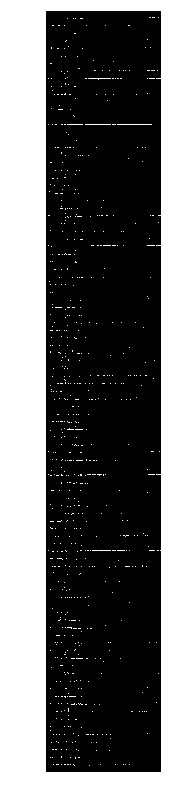

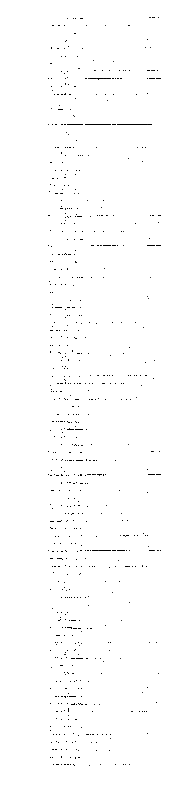

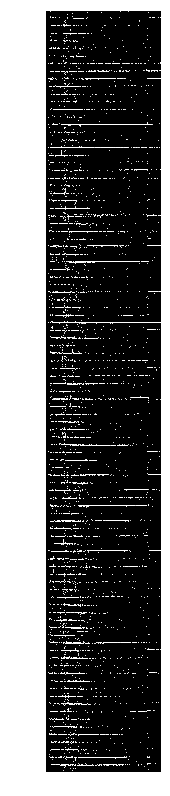

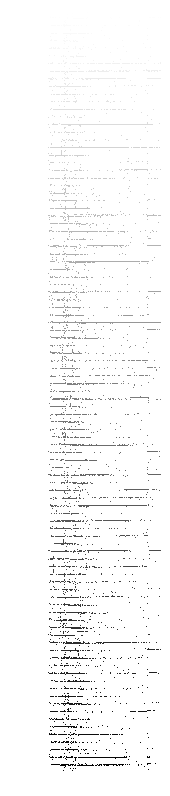

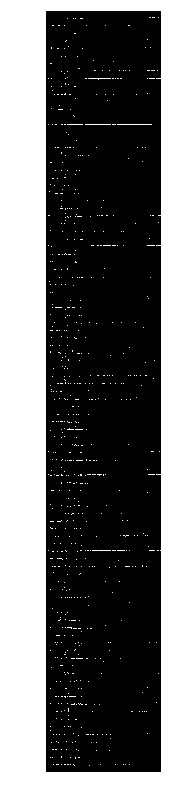

In [26]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/home/rcardiff/combined_img.png')
img = img[15000:25000]
image_show(img)


#thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,3,12)
#image_show(thresh)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_inv = np.invert(gray)
image_show(gray_inv)

# noise removal
kernel = np.ones((3,3),np.uint8)

grad = cv.morphologyEx(gray_inv,cv.MORPH_GRADIENT, kernel, iterations =1)
image_show(grad)


# Marker labelling
ret, markers = cv.connectedComponents(grad)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
#markers[unknown==255] = 0



markers = cv.watershed(img,markers)
image_show(-markers)
image_show(img)

from skimage.measure import regionprops
print(len(regionprops(markers)))